In [98]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [160]:
#generate dataset:
from sklearn.datasets import make_classification
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2,random_state=45634564,hypercube=True,n_classes=2,flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')

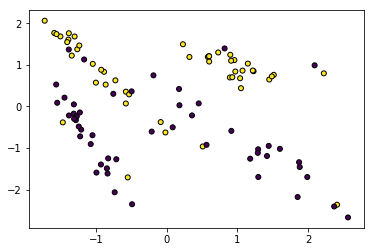

In [161]:
#plot dataset
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
#split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
#initialize and run classifier:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)   

0.75757575757575757

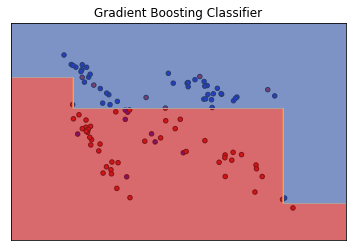

In [164]:
from sklearn import clone
from matplotlib.colors import ListedColormap


# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=1, random_state=0)
# Train
clf = clone(model)
clf = model.fit(X_train, y_train)

# Plot the training points, these are clustered together and have a
# black outline
plt.scatter(X[:, 0], X[:, 1], c=Y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
a=0
if a==1:
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)


#plt.axis("tight")
plt.title("Gradient Boosting Classifier")
plt.legend()

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

## 